In [2]:
#importing  various Libraries for the required tasks
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('car_data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df_final=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [7]:

df_final

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
df_final=pd.get_dummies(df_final,drop_first=True)

In [10]:
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [12]:
x=df_final.iloc[:,1:]
y=df_final.iloc[:,0]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train.shape

(240, 8)

In [14]:
y_train.shape

(240,)

In [15]:
x_test.shape

(61, 8)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()

In [18]:
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
#Model Evaluation
print("Intercept", reg.intercept_)

Intercept 2014.1277692488723


In [20]:
#calculations of reg
print("Coefficient",reg.coef_)

Coefficient [ 5.52225259e-01 -2.55811351e-01 -2.62547257e-05 -7.24267760e-01
 -4.78727816e-01 -4.90832764e-02  3.40742690e-01 -7.62744689e-02]


In [21]:
#Prediction of result

predictions = reg.predict(x_test)

In [22]:
print(predictions)

[2014.11245734 2014.25043829 2014.79555529 2014.95914964 2018.13788481
 2015.3654302  2013.41738175 2014.42470459 2013.98658935 2013.13500288
 2013.72550983 2014.48460823 2014.91538186 2015.2837897  2013.96335504
 2018.77430009 2015.59538649 2013.84600773 2013.48018935 2014.77960386
 2013.14669191 2014.6274939  2013.54556179 2016.14069041 2012.68645719
 2014.42773473 2012.38257183 2013.77814094 2014.02470215 2010.38146339
 2011.38349814 2013.75602962 2013.76486797 2015.59831302 2011.27464255
 2014.3660801  2015.25722269 2013.13752881 2012.88246137 2012.89321872
 2016.1118515  2014.41260444 2015.4635895  2013.1356268  2013.36670375
 2016.27400112 2013.57280942 2014.46616308 2012.94495291 2014.08202619
 2014.74658587 2014.1424364  2012.66685512 2016.19338674 2014.14952242
 2013.89193643 2014.08070147 2012.78082227 2013.34490064 2013.0486384
 2010.46700223]


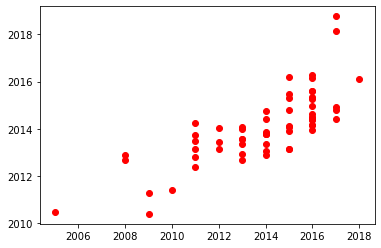

In [33]:
#graph plotting
plt.scatter(y_test, predictions,color='red')

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
print("Mean_square_error", mean_squared_error(y_test, predictions))
print("Root Mean_square_error", mean_squared_error(y_test, predictions,squared= False))

Mean_square_error 3.1638436839396724
Root Mean_square_error 1.7787196754799988


In [26]:
print("R-Square", r2_score(y_test, predictions))

R-Square 0.5415272860838258
